### 1- Importing Libraries:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
from scipy import stats

### 2- Importing dataset:

In [4]:
H_data = pd.read_csv('Housing.csv')

### 3- Exploratory Data Analysis:

In [57]:
# to have an idea how the dataset looks like, catagories & observations
H_data.head()

,Unnamed: 0,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,521,الرياض,حي الجنادرية,شرق,246,0,5,5,2,1,...,0,0,0,0,0,1,0,0,40000,درج داخلي للايجار التوالصل 0538143083
1,1653,جدة,حي بريمان,جنوب,350,0,7,5,2,1,...,1,0,0,0,1,1,1,0,45000,فلة روف مكونه من٩غرف و٧حمامات وسطح مرة كبير ون...
2,131,الرياض,حي الرمال,جنوب,280,3,4,3,1,0,...,0,0,1,0,0,1,0,1,3300,درج داخلي للأيجار شهري3300\nالمواصفات \nالأرض...
3,2284,الدمام,حي ضاحية الملك فهد,شمال,250,5,5,5,3,1,...,1,0,1,0,0,1,0,0,36000,للايجار فيلا دبلكس دورين وملحق في ضاحيه الملك ...
4,65,الرياض,حي الروضة,جنوب,352,30,7,5,2,1,...,1,0,1,0,0,1,0,1,80000,الجزء الثالث والاخير للتصوير\n================...


In [58]:
H_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974 entries, 0 to 2973
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2974 non-null   int64 
 1   city          2974 non-null   object
 2   district      2974 non-null   object
 3   front         2974 non-null   object
 4   size          2974 non-null   int64 
 5   property_age  2974 non-null   int64 
 6   bedrooms      2974 non-null   int64 
 7   bathrooms     2974 non-null   int64 
 8   livingrooms   2974 non-null   int64 
 9   kitchen       2974 non-null   int64 
 10  garage        2974 non-null   int64 
 11  driver_room   2974 non-null   int64 
 12  maid_room     2974 non-null   int64 
 13  furnished     2974 non-null   int64 
 14  ac            2974 non-null   int64 
 15  roof          2974 non-null   int64 
 16  pool          2974 non-null   int64 
 17  frontyard     2974 non-null   int64 
 18  basement      2974 non-null   int64 
 19  duplex

In [5]:
# to explore how many columns and rows we have in total
H_data.shape

(2974, 25)

In [60]:
# to get statistical summary of our data
H_data.describe()

,Unnamed: 0,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,...,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
count,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,...,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2.974000e+03
mean,1858.833557,366.525891,5.133490,5.087761,4.604573,2.238399,0.911231,0.799597,0.492939,0.792872,...,0.563551,0.519839,0.161399,0.803968,0.033961,0.495965,0.816745,0.079018,0.184600,8.724988e+04
std,1075.717674,209.059809,7.664641,1.242549,0.701490,0.915901,0.284458,0.400370,0.500034,0.405317,...,0.496028,0.499690,0.367960,0.397060,0.181159,0.500068,0.386940,0.269812,0.388038,7.230267e+04
min,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+03
25%,930.250000,270.000000,0.000000,4.000000,4.000000,2.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.225000e+04
50%,1865.500000,330.000000,2.000000,5.000000,5.000000,2.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.000000e+04
75%,2789.750000,400.000000,8.000000,6.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000e+05
max,3717.000000,5000.000000,36.000000,7.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.700000e+06


In [59]:
# to look for null values in our data
H_data.isnull().sum()
# No need to drop as data in details column would not effect our analysis

Unnamed: 0       0
city             0
district         0
front            0
size             0
property_age     0
bedrooms         0
bathrooms        0
livingrooms      0
kitchen          0
garage           0
driver_room      0
maid_room        0
furnished        0
ac               0
roof             0
pool             0
frontyard        0
basement         0
duplex           0
stairs           0
elevator         0
fireplace        0
price            0
details         62
dtype: int64

In [40]:
# Getting the overall prices of different apartment types among all cities

H_data.groupby(['bedrooms']).price.agg(['mean'])

,mean
bedrooms,
1,68900.000000
2,64741.379310
3,99874.157303
4,94525.368249
5,88825.397456
6,74768.840580
7,80833.619211


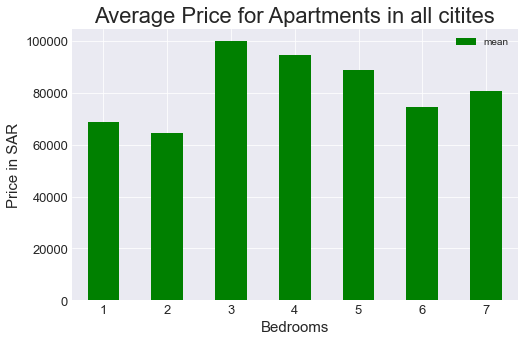

In [63]:
Bedrooms_prices = H_data.groupby(['bedrooms']).price.agg(['mean'])
ax = Bedrooms_prices.plot(kind='bar', figsize=(8,5), color="green", fontsize=13)
plt.style.use('seaborn-darkgrid')
plt.title('Average Price for Apartments in all citites', fontsize=22)
plt.xlabel('Bedrooms', fontsize = 15)
plt.xticks(rotation=0)
plt.ylabel('Price in SAR', fontsize = 15)
plt.show()


In [52]:
# Average price for aapartment types in all cities
# We also see that الخبر has no 2bed apts listed in our data
H_data.groupby(['city', "bedrooms"]).price.agg(['mean'])

mean
city    bedrooms               
 الخبر  1          65000.000000
        3          67600.000000
        4         105057.692308
        5          73528.804348
        6          62796.296296
        7          70238.095238
 الدمام 1          97500.000000
        2          80000.000000
        3          62125.000000
        4          51543.750000
        5          59750.000000
        6          73027.027027
        7          70507.874016
 الرياض 1          61500.000000
        2          70400.000000
        3         106194.444444
        4          92800.000000
        5          94152.976190
        6         103584.000000
        7          92377.358491
 جدة    1          60000.000000
        2          63903.846154
        3         119813.114754
        4         106902.343750
        5         122514.792899
        6          95629.629630
        7         109020.618557

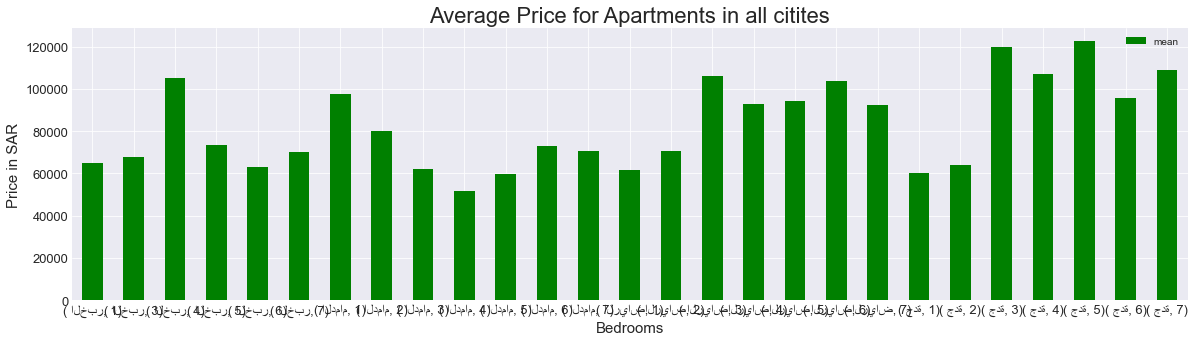

In [23]:
Cities_Apartments = H_data.groupby(['city', "bedrooms"]).price.agg(['mean'])
lx = Cities_Apartments.plot(kind='bar', figsize=(20,5), color="green", fontsize=13)
plt.style.use('seaborn-darkgrid')
#plt.bar(Cities_Apartments, 2, 0.4, )
plt.title('Average Price for Apartments in all citites', fontsize=22)
plt.xlabel('Bedrooms', fontsize = 15)
plt.xticks(rotation=0)
plt.ylabel('Price in SAR', fontsize = 15)
plt.show()

Text(0.5, 1.0, 'Average of Apartment Size in each City')

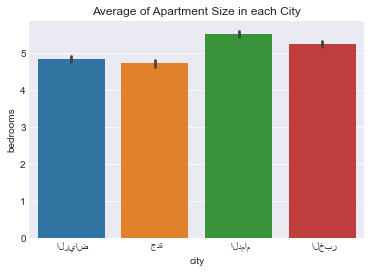

In [24]:

plt.style.use('seaborn-darkgrid')
sns.barplot(data = H_data, x = 'city', y = 'bedrooms')
plt.title('Average of Apartment Size in each City')

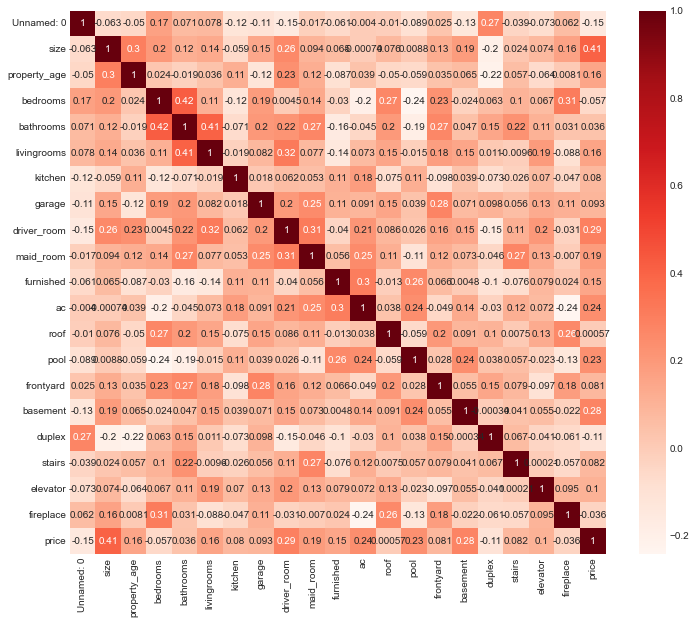

In [26]:
#Correlation between features
plt.figure(figsize=(12,10))
cor = H_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show(); 

### 4- Data Cleaning:

In [30]:
def fixTypes(details):
    details =  str(details)
    rent = "Unkown"
    if( details.find('دور') != -1 or details.find('دور') != -1 ):
        rent = 'floor'
    elif( details.find('شقه') != -1):
        rent = 'apartment'
    elif( details.find('فله') != -1 or details.find('فلة') != -1 or details.find('فيلا') != -1 or details.find('دبلكس') != -1 or details.find('دوبلكس') != -1 or 
        details.find('بيت') != -1 or details.find('ڤيلا') != -1 or details.find('فلل') != -1 or details.find('دبلوكسين') != -1 or details.find('فلا') != -1
        or details.find('فيلا ') != -1 or details.find('دبلوكس ') != -1):  
        rent = 'house'
    else:
        rent = 'Unkown'
        
    return rent

H_data.loc[:,'Accommodation types'] = H_data.loc[:,'details'].apply(fixTypes)

In [31]:
H_data.head()

,Unnamed: 0,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,...,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details,Accommodation types
0,521,الرياض,حي الجنادرية,شرق,246,0,5,5,2,1,...,0,0,0,0,1,0,0,40000,درج داخلي للايجار التوالصل 0538143083,Unkown
1,1653,جدة,حي بريمان,جنوب,350,0,7,5,2,1,...,0,0,0,1,1,1,0,45000,فلة روف مكونه من٩غرف و٧حمامات وسطح مرة كبير ون...,house
2,131,الرياض,حي الرمال,جنوب,280,3,4,3,1,0,...,0,1,0,0,1,0,1,3300,درج داخلي للأيجار شهري3300\nالمواصفات \nالأرض...,floor
3,2284,الدمام,حي ضاحية الملك فهد,شمال,250,5,5,5,3,1,...,0,1,0,0,1,0,0,36000,للايجار فيلا دبلكس دورين وملحق في ضاحيه الملك ...,floor
4,65,الرياض,حي الروضة,جنوب,352,30,7,5,2,1,...,0,1,0,0,1,0,1,80000,الجزء الثالث والاخير للتصوير\n================...,house


- Accomodation types

In [42]:
H_data.groupby(['city', 'district','Accommodation types'])['size'].mean().to_frame()

size
city   district       Accommodation types            
 الخبر    حي الامواج  floor                436.575000
                      house                428.500000
          حي البحيرة  floor                300.000000
                      house                375.000000
          حي التحلية  Unkown               205.000000
...                                               ...
 جدة      حي بريمان   house                350.000000
          حي طيبة     Unkown               325.000000
                      floor                474.545455
                      house                464.250000
          حي مشرفة    floor                437.000000

[367 rows x 1 columns]

In [33]:
d_floor = H_data[H_data['Accommodation types'] == 'floor']

(0.0, 1364945.0)

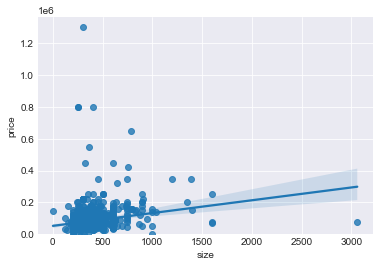

In [34]:
# Engine size as potential predictor variable of price
sns.regplot(x="size", y="price", data=d_floor)
plt.ylim(0,)

In [35]:
#Correlation between size and price 
d_floor[["size", "price"]].corr()

,size,price
size,1.000000,0.192309
price,0.192309,1.000000


In [36]:
#Correlation between size and price 
d_floor[["ac", "price"]].corr()

,ac,price
ac,1.000000,0.290579
price,0.290579,1.000000


- Check the rent due frequnecy

In [38]:
def fixRent(details):
    details =  str(details)
    rent = "Unkown"
    if( details.find('شهري') != -1 or details.find('بالشهر') != -1):
        rent = 'Monthly'
    elif( details.find('يومي') != -1 or details.find('باليوم') != -1 ):
        rent = 'Daily'
    else:
        rent = 'Unkown'
        
    return rent

H_data.loc[:,'rent frequnecy'] = H_data.loc[:,'details'].apply(fixRent)

In [39]:
H_data.loc[:,['price',"details",'rent frequnecy']]

,price,details,rent frequnecy
0,40000,درج داخلي للايجار التوالصل 0538143083,Unkown
1,45000,فلة روف مكونه من٩غرف و٧حمامات وسطح مرة كبير ون...,Unkown
2,3300,درج داخلي للأيجار شهري3300\nالمواصفات \nالأرض...,Monthly
3,36000,للايجار فيلا دبلكس دورين وملحق في ضاحيه الملك ...,Unkown
4,80000,الجزء الثالث والاخير للتصوير\n================...,Unkown
...,...,...,...
2969,33000,دبلكس الاجار جديد ثلاثه ادوار الحي السابع كل ٦...,Unkown
2970,50000,فيلا دورين درج داخلي مجددة,Unkown
2971,37000,فلا للايجار فى الحي الخامس التاسع \nتتكون ثلاث...,Unkown
2972,35000,فيلا للإيجار على زاوية\nمطبخ راكب \n٤ غرف نوم ...,Monthly


In [40]:
H_data.groupby(['rent frequnecy']).size()

rent frequnecy
Daily         3
Monthly      54
Unkown     2917
dtype: int64

In [41]:
H_data[H_data['rent frequnetly'] == 'Daily']

,Unnamed: 0,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,...,basement,duplex,stairs,elevator,fireplace,price,details,Accommodation types,rent frequnetly,rent frequnecy
363,1100,جدة,حي الزمرد,شمال,350,0,4,4,1,1,...,0,0,1,0,0,3000,فيلا دورين مكونة من 4 غرف نوم و 4 دورات مياه و...,floor,Daily,Daily
1279,1225,جدة,حي الشاطئ,غرب,350,2,3,4,2,1,...,0,1,1,0,0,2500,فيلا مؤثثه نظيفه جدا للايجار اليومي \nبالسعر ا...,house,Daily,Daily
2411,1192,جدة,حي الزمرد,جنوب,550,7,4,4,3,1,...,0,1,0,0,1,2000,فيلا للايجار اليومي بخصوصية تامه,house,Daily,Daily
